# Kmeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv').rename({'Unnamed: 0':'index'},axis=1)
df

,index,x,y
0,0,0.874365,5.926937
1,1,-3.185937,2.356974
2,2,-3.472231,3.131644
3,3,0.589067,4.318645
4,4,-2.955939,2.162257
...,...,...,...
395,395,-0.065350,5.021496
396,396,0.097164,4.883143
397,397,0.844816,0.478342
398,398,0.764886,2.855046


- `random_init`:این تابع مقداردهی اولیه را انجام میدهد
- `show_scatter`:این تابع ابتدا تعدادی رنگ مناسب انتخاب کرده و هر کدام را به یک خوشه تخصیص میدهد.سپس به ازای هر خوشه تمام مقادیر آن خوشه را به همراه مرکز خوشه رسم میکند.
- `assign_labels_to_points`:این تابع به ازای همه داده های ورودی فاصله شان را تا همه مراکز خوشه ها حساب میکند و سپس لیبل داده را معادل با لیبل نزدیک ترین مرکز خوشه قرار میدهد.
- `move_centers`:در مرحله قبل داده ها لیبل های جدیدی گرفتند.حال این تابع به ازای هر خوشه میانگین مقادیر متعلق به همان خوشه(مقادیر با لیبل مشترک) را حساب کرده و به عنوان مرکز جدید خوشه قرار میدهد.
- `fit`:این تابع که تابع اصلی برنامه است به تعداد مشخص ۲ مرحله را تکرار میکند.اول نسبت به مراکز فعلی همه داده های نمونه را لیبل گذاری میکند و سپس با توجه به لیبل های آپدیت شده مراکز را جابجا میکند و در نهایت نمودار را رسم میکند.
 

In [10]:
class KMeans: 
    def __init__(self) -> None:
        pass

    def random_init(self, data, n_clusters, init_centers, show_plot=True):
        self.show_plot = show_plot
        self.n_samples_ = len(data.x)
        self.new_cents_ = init_centers
        self.center_random_=[]
        self.X_ = np.asanyarray(data.iloc[:,1:])
        self.n_clusters = n_clusters

    def show_scatter(self,X1,y1,centers1):
        fig = plt.figure(figsize=(6, 4))
        colors = plt.cm.Spectral(np.linspace(0, 1, self.n_clusters))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title(f'Plot for {self.n_clusters} clusters')

        for l,col in zip(range(self.n_clusters),colors):
            subset = (y1 == l)
            ax.plot(X1[subset,0], X1[subset,1],'w', markerfacecolor=col, marker='o',markersize=8)
            ax.plot(centers1[l][0], centers1[l][1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)

    def dist(self,p1,p2):
        return (p1[0]-p2[0])*(p1[0]-p2[0])+(p1[1]-p2[1])*(p1[1]-p2[1])

    def assign_labels_to_points(self,X2, centers2, n_samples=10):
        labels = list()
        for sample in range(n_samples):
            min_d=10000
            index=0
            for cent in range(len(centers2)):
                d = self.dist(np.array(X2[sample]), np.array(centers2[cent]))
                if d < min_d:
                    min_d = d
                    index = cent
            labels.append(index)
            self.labels_ = labels

    def move_centers(self, X3,labels3):
        new_cents = []
        for i in range(self.n_clusters):
            subset = (np.array(labels3)==i)
            new_cents.append([X3[subset,0].mean(),X3[subset,1].mean()])
        self.new_cents_ = new_cents
        
    def fit(self, repeat=50): 
        for i in range(repeat):
            self.assign_labels_to_points(self.X_,self.new_cents_,self.n_samples_)
            self.move_centers(self.X_,self.labels_)
        if(self.show_plot):
            self.show_scatter(np.array(self.X_), np.array(self.labels_), np.array(self.new_cents_ ))


در اینجا برای اجرای الگوریتم از تعداد خوشه های ۱ تا ۲۰ استفاده شده.به ازای هر کدام به تعداد خوشه مورد نظر از درون دیتاست به صورت رندم داده انتخاب میشود.چون ورودی این الگوریتم ابتدا تعدادی مرکز دسته رندوم نیاز دارد و بهتر است به جای اعداد کاملا رندوم از تعدادی از دیتا های موجود استفاده کرد که الگوریتم زودتر به جواب بهینه برسد.

/var/folders/bf/9616ns414yg2qn2p8czl2sr00000gn/T/ipykernel_12789/2421995629.py:48: RuntimeWarning: Mean of empty slice.
  new_cents.append([X3[subset,0].mean(),X3[subset,1].mean()])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


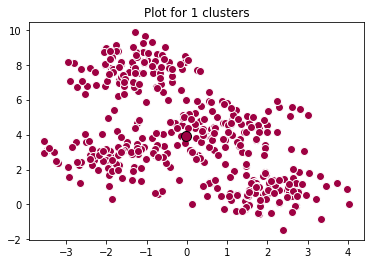

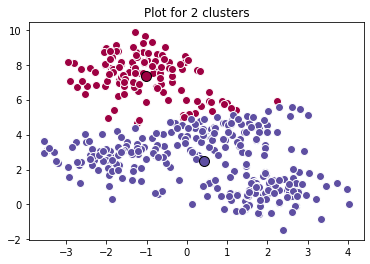

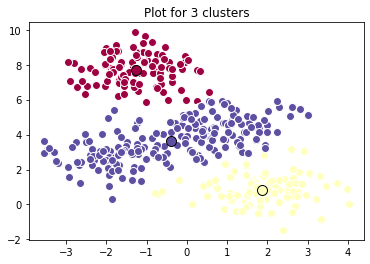

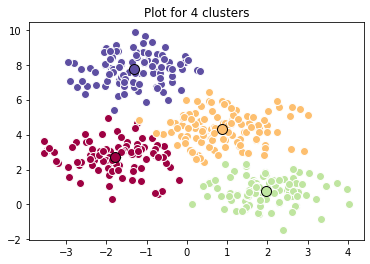

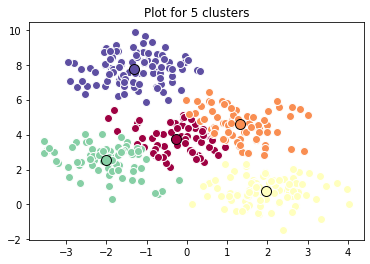

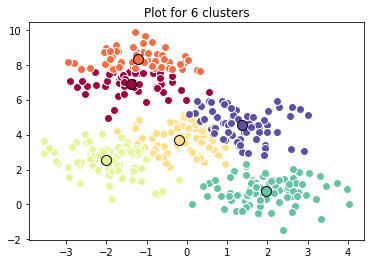

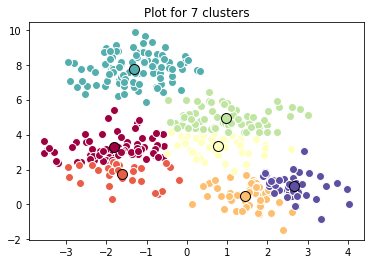

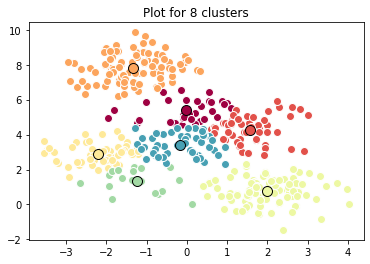

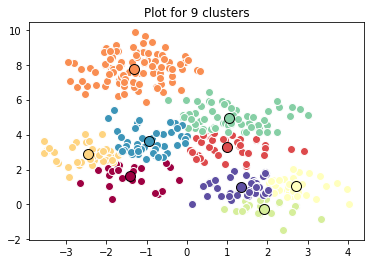

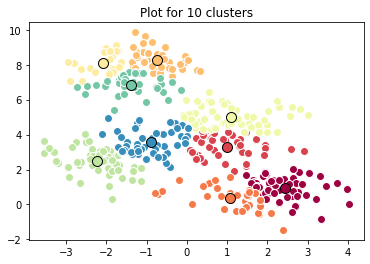

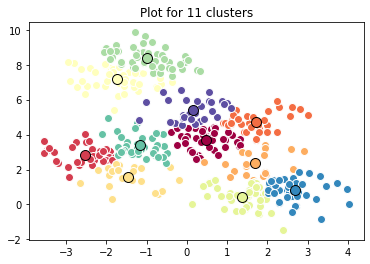

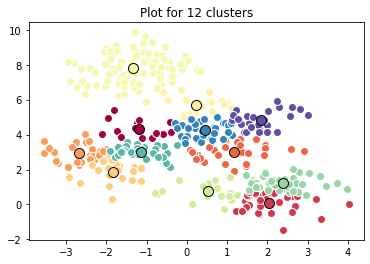

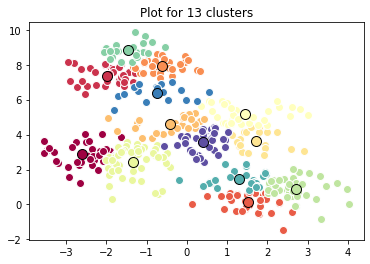

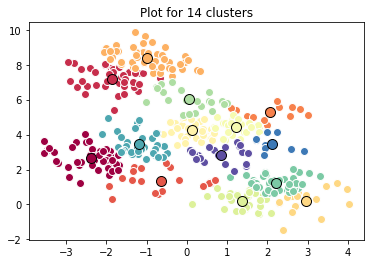

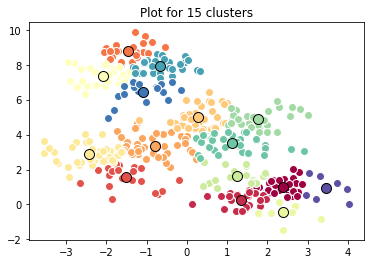

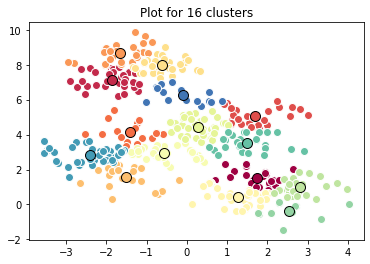

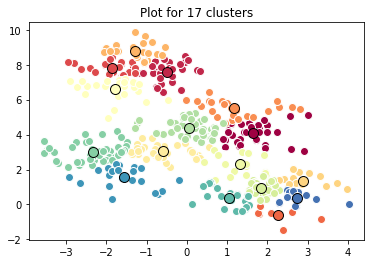

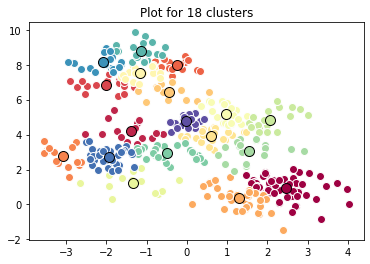

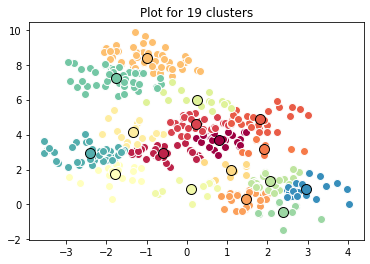

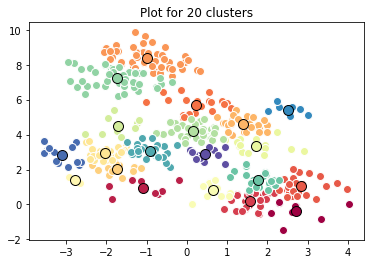

In [11]:
for i in range(20):
    rand_index = np.random.randint(400,size=i+1)
    rand_centers = np.asanyarray(df.loc[df.index.isin(rand_index),'x':'y']).tolist()
    kmeans = KMeans()
    kmeans.random_init(data=df, n_clusters=i+1, init_centers=rand_centers)
    kmeans.fit()

# Image Processing

برای نمایش عکس در پایتون معمولا از ۲ کتابخانه زیر استفاده میشود.

matplotlib,opencv

در اینجا از یکی از دو کتابخانه برای لود عکس استفاده شده و سپس تصویر اصلی رسم شده است.

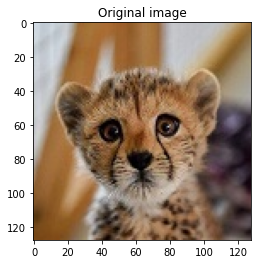

In [12]:
import matplotlib.pyplot as plt
import numpy as np
pirooz_plt = plt.imread('pirooz.jpg')
pirooz = np.copy(pirooz_plt)
plt.title('Original image')
plt.imshow(pirooz)
plt.show()

الگوریتم نوشته شده در بخش قبل ۲ ویژگی برای هر داده را ورودی میگیرد.میدانیم هر عکس از ۳ چنل آبی و قرمز و زرد تشکیل شده است.عکس هایی که با این کتابخانه لود میشود هم ۳ چنل را به صورت یک آرایه به ما میدهند.برای اینکه این عکس را ورودی به الگوریتم دهیم نیاز داریم فقط ۲ چنل داشته باشیم که اینکار را با جدا کردن چنل ابی و قرمز انجام دادم.
و همینطور ورودی ما باید شکل ورودی الگوریتم باشد برای همین تمام داده ها را که ابتدا به شکل ۱۲۸*۱۲۸ است به شکل ۱۶۳۸۴ تبدیل کرده و سپس از این دو ورودی دیتافریمی ساختم که دقیقا دارای ورودی با مشخصات مورد نیاز در ورودی الگوریتمم باشد.

In [6]:
blue = pirooz[:,:,0]
blue = blue.reshape((16384,))
red = pirooz[:,:,2]
red = red.reshape((16384,))

In [7]:
df_input = pd.DataFrame(data = {'index':np.arange(16384),'x':blue,'y':red})
df_input

,index,x,y
0,0,214,232
1,1,213,231
2,2,212,230
3,3,212,230
4,4,200,219
...,...,...,...
16379,16379,112,96
16380,16380,108,95
16381,16381,103,90
16382,16382,100,88


در این بخش برای ۳ تعداد خوشه متفاوت ۵ و ۱۰ و ۱۵ الگوریتم را اجرا کردم.ابتدا برای هر کدام مراکز رندوم انتخاب شده و الگوریتم اجرا میشود.
در اینجا مراکز دسته و اینکه هر داده به چه دسته ای تعلق دارد را داریم و باید هر داده را به مرکز دسته خودش مپ کنیم.پس با ساخت ۲ دیتافریم(یکی مقدار مرکز دسته ها و دیگری شماره دسته هر داده) و مرج کردن آنها هر داده مقدار دسته خودش را میگیرد.
این خروجی باید به همان شکل استاندارد عکس تبدیل شود.یعنی۳ * ۱۲۸ * ۱۲۸
پس بعد از تغییر شکل دادن آن ، مقادیر جدید هر چنل را دوباره به عکس اولیه اساین میکنیم.حال اگر این تصویر دوباره چاپ شود خروجی معادل خروجی رنگ ها از الگوریتم خودمان خواهد بود.

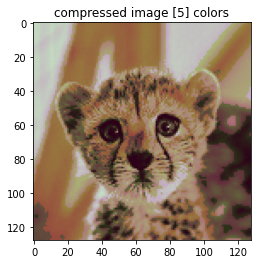

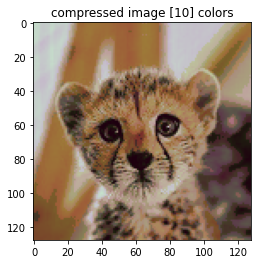

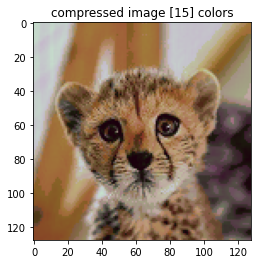

In [9]:
for i in [5,10,15]:
    rand_index = np.random.randint(16384,size=i)
    rand_centers = np.asanyarray(df_input.loc[df_input.index.isin(rand_index),'x':'y']).tolist()
    kmeans = KMeans()
    kmeans.random_init(data=df_input, n_clusters=i, init_centers=rand_centers, show_plot = False)
    kmeans.fit()
    x = np.asanyarray(kmeans.new_cents_)[:,0]
    y = np.asanyarray(kmeans.new_cents_)[:,1]
    df_centers = pd.DataFrame(data={'x':x,'y':y})
    df_labels = pd.DataFrame(data={'label':kmeans.labels_})
    df_result = pd.merge(df_centers,df_labels,how='right',right_on='label',left_index=True)
    pirooz[:,:,0] = np.asanyarray(df_result.x).reshape(128,128)
    pirooz[:,:,2] = np.asanyarray(df_result.y).reshape(128,128)
    plt.title(f'compressed image [{i}] colors')
    plt.imshow(pirooz)
    plt.show()